## Upload the files and create the dataframes

In [115]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
import math
import numpy as np
import itertools
pd.options.mode.chained_assignment = None

As our analysis will be based on politicians quotes, let's upload dataset for congress and senators:
politician names and their corresponding US state

In [3]:
# Files with congress people in them (2015 - present)
congress_114 = pd.read_csv("data/term-114.csv")
congress_115 = pd.read_csv("data/term-115.csv")
congress_116 = pd.read_csv("data/term-116.csv")

#only current senators
senators = pd.read_csv("data/us_senators.csv")

**Congress:**

In [4]:
#preprocessing
congress_114['area'] = congress_114['area'].str.split("'")
congress_115['area'] = congress_115['area'].str.split("'")
congress_116['area'] = congress_116['area'].str.split("'")
congress_114['area'] = congress_114['area'].str[0]
congress_115['area'] = congress_115['area'].str[0]
congress_116['area'] = congress_116['area'].str[0]

In [5]:
congress = pd.concat([congress_114, congress_115, congress_116])
congress.name.value_counts()

Michael T. McCaul       3
Linda T. Sánchez        3
Marcy Kaptur            3
Marcia L. Fudge         3
Marc A. Veasey          3
                       ..
Scott Garrett           1
Stephen Lee Fincher     1
Steve Israel            1
Tammy Duckworth         1
Xochitl Torres Small    1
Name: name, Length: 603, dtype: int64

In [6]:
congress = congress.drop_duplicates(subset=['name'])
congress.shape

(603, 19)

In [7]:
congress.head()

,id,name,sort_name,email,twitter,facebook,group,group_id,area_id,area,chamber,term,start_date,end_date,image,gender,wikidata,wikidata_group,wikidata_area
0,cfc9cc09-a33a-42d9-89c3-14effb20b8b0,Aaron Schock,"Schock, Aaron",NaN,AaronSchock,RepAaronSchock,Republican,republican,IL-18,Illinois,House of Representatives,114,NaN,2015-03-31,https://theunitedstates.io/images/congress/ori...,male,Q302659,Q29468,Q3032529
1,e0b61cab-a183-4a44-bb0a-81f25fda8de3,Adam B. Schiff,"Schiff, Adam",NaN,RepAdamSchiff,RepAdamSchiff,Democrat,democrat,CA-28,California,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q350843,Q29552,Q5020000
2,159bbcc4-afee-4a5d-9097-e2be4d8ca9c7,Adam Kinzinger,"Kinzinger, Adam",NaN,RepKinzinger,RepKinzinger,Republican,republican,IL-16,Illinois,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q349955,Q29468,Q3477977
3,fed6fe02-7935-4711-a190-fed9abd0a5ae,Adam Smith,"Smith, Adam",NaN,RepAdamSmith,RepAdamSmith,Democrat,democrat,WA-9,Washington,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q350916,Q29552,Q7971571
4,4eb41831-ea19-4833-86f9-6f6c3ba72451,Adrian Smith,"Smith, Adrian",NaN,RepAdrianSmith,NaN,Republican,republican,NE-3,Nebraska,House of Representatives,114,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q373443,Q29468,Q6984664


In [8]:
names = congress.name
sen_names = senators.Senator
congress.columns

Index(['id', 'name', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'area', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area'],
      dtype='object')

**First, let's compare the distribution of speakers for Republican and Democrats.**

In [9]:
#keep group to compare Republican and Democrats
congress_demo_rep= congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area'])

congress_demo_rep = congress_demo_rep.rename(columns={"area": "state", "name": "speaker"})
congress_demo_rep.group.value_counts()

Republican     318
Democrat       284
Independent      1
Name: group, dtype: int64

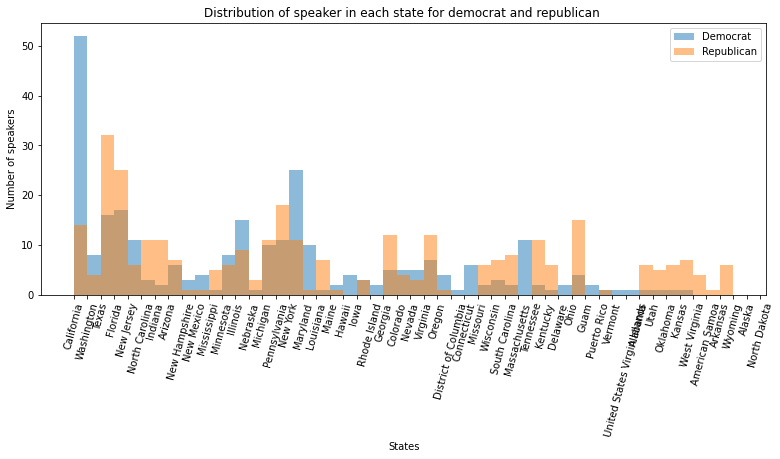

In [10]:
plt.figure(figsize=(13,5))
plt.hist(congress_demo_rep[congress_demo_rep['group']=='Democrat'].state, alpha=0.5, label='Democrat', bins = np.arange(50))
plt.hist(congress_demo_rep[congress_demo_rep['group']=='Republican'].state, alpha=0.5,label='Republican', bins = np.arange(50))
plt.legend(loc='upper right')
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state for democrat and republican ')
plt.xticks(rotation = 75)
plt.show()

This histogram shows the distribution of speaker in each state depending on their political group, either democrat or republican. We can see that in California, democrats are much more present than republicans. Same in New-York. Indeed, California autorizes since june 2013 gay wedding thanks to the Supreme Court. In New-York, it is the case since 2011. It has been the case for all states in june 2015.

**Let's compare the congress by gender**

In [11]:
congress_gender= congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'wikidata', 'wikidata_group',
       'wikidata_area'])

congress_gender = congress_gender.rename(columns={"area": "state", "name": "speaker"})
congress_gender.gender.value_counts()

male      466
female    137
Name: gender, dtype: int64

We can see that there are much more male speakers (ratio 466:137). It is not surprising as male tend to be much more represented in politics.

In [12]:
congressdropped = congress.drop(columns = ['id', 'sort_name', 'email', 'twitter', 'facebook', 'group',
       'group_id', 'area_id', 'chamber', 'term', 'start_date',
       'end_date', 'image', 'gender', 'wikidata', 'wikidata_group',
       'wikidata_area']).rename(columns={"area": "state", "name": "speaker"})
congressdropped.sample(5)

,speaker,state
424,Tom Emmer,Minnesota
12,Alma S. Adams,North Carolina
121,Doug LaMalfa,California
196,Jerry McNerney,California
251,Katie Porter,California


**Senators:**

In [17]:
senators.sample(3)

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence
62,New York,NaN,Chuck Schumer,NaN,Democratic,"November 23, 1950 (age 70)",Lawyer,U.S. HouseNew York State Assembly,"Harvard University (AB, JD)","January 3, 1999",2022,New York City
47,Mississippi,NaN,Cindy Hyde-Smith,NaN,Republican,"May 10, 1959 (age 62)",Farmer,Mississippi Commissioner of Agriculture and Co...,Copiah-Lincoln Community College (AA) Universi...,"April 9, 2018[p]",2026,Brookhaven
68,Ohio,NaN,Sherrod Brown,NaN,Democratic,"November 9, 1952 (age 68)",Teacher,U.S. HouseOhio Secretary of StateOhio House of...,Yale University (BA) Ohio State University (BA...,"January 3, 2007",2024,Cleveland[42]


In [18]:
#remove useless columns
senatorsdropped = senators.drop(columns = ['Portrait', 'Party', 'Party.1', 'Born',
       'Occupation(s)', 'Previous electiveoffice(s)', 'Education',
       'Assumed office', 'Term up', 'Residence']).rename(columns = {'State': 'state', 'Senator': 'speaker'})
senatorsdropped.sample(5)

,state,speaker
36,Maine,Susan Collins
71,Oklahoma,James Lankford
23,Idaho,Jim Risch
72,Oregon,Ron Wyden
66,North Dakota,John Hoeven


**Both senators and congress:**

In [19]:
politicians = pd.concat([senatorsdropped, congressdropped]).drop_duplicates(subset=['speaker'])
names = politicians.speaker
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
424,Texas,Van Taylor
426,Texas,Veronica Escobar
430,Florida,W. Gregory Steube
435,South Carolina,William R. Timmons IV


## Normalization

We need population size per state, to normalize our data and get meaningful analysis:

In [16]:
# Upload population size per state and creation of dataframe:

population_size=pd.read_csv("data/annual_population.csv", sep=";")
population_size=population_size.set_index(['States'])

#remove dots present in front of some states names:
idx_list=[]
for idx,rows in population_size.iterrows():
    idx=idx.replace('.','')
    idx_list.append(idx)
population_size.index=idx_list

region=['United States', 'Northeast', 'Midwest', 'South', 'West']
index=population_size.index.to_list()
index=[x for x in index if x not in region]

#dataframe containing the annual (2015->2020) population size of each USA state
population_size_state=population_size.loc[index]

population_size_state.drop(['2015', '2016', '2017', '2018', '2019', '2020'], axis=1,inplace=True)
population_size_state=population_size_state.rename(columns={'Unnamed: 0':'States', "2015.1": "2015", "2016.1": "2016", "2017.1": "2017", "2018.1": "2018", "2019.1": "2019", "2020.1": "2020"})

population_size_state.sample(5)

,2015,2016,2017,2018,2019,2020
Wyoming,586389,585243,579994,579054,580116,582328
Idaho,1652495,1684036,1719745,1752074,1789060,1826913
Minnesota,5484002,5525360,5569283,5608762,5640053,5657342
Louisiana,4666998,4681346,4673673,4664450,4658285,4645318
West Virginia,1843332,1832435,1818683,1805953,1795263,1784787


In [25]:
# normalization weights:
population_size_state.astype(float)
population_size_state=(population_size_state-population_size_state.mean())/population_size_state.std()
population_size_state.sample(5)

,2015,2016,2017,2018,2019,2020
Tennessee,0.042718,0.043751,0.046630,0.050450,0.053369,0.057811
Kentucky,-0.259343,-0.261847,-0.263388,-0.265408,-0.267264,-0.268908
Minnesota,-0.112250,-0.111872,-0.110559,-0.109180,-0.108482,-0.108898
Illinois,0.916212,0.896624,0.878935,0.862176,0.847031,0.830778
Delaware,-0.745584,-0.744276,-0.743361,-0.742804,-0.742599,-0.742183


### For year 2015

We import the data containing quotations, based on QuoteBank:

In [20]:
# Merge quote data with speaker state data
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])

#drop useless columns:
merged=merged.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)
merged=merged.rename(columns={"state_x": "state"})
merged.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
426,"To my mind, I think the evidence is very, very...",Bernie Sanders,2015-10-25 20:20:32,1,['http://hotair.com/headlines/archives/2015/10...,Vermont
593,The Church's teachings on gay marriage are wel...,Dick Durbin,2015-12-23 00:00:00,1,['http://latinpost.com/articles/104018/2015122...,Illinois
278,There are already transgender people serving i...,Tammy Baldwin,2015-07-14 17:34:00,1,['http://www.washingtonblade.com/2015/07/14/re...,Wisconsin
26,"To say we will persecute a Christian pastor, a...",Ted Cruz,2015-04-03 19:15:04,1,['http://www.westernjournalism.com/ted-cruz-de...,Texas
529,"If in fact, as the polls indicate, a growing n...",Marco Rubio,2015-05-26 20:05:00,3,['http://www.orlandosentinel.com/news/breaking...,Florida


In [21]:
merged2015=pd.DataFrame(merged.groupby("state")['numOccurrences'].sum())
merged2015.sample(5)

,numOccurrences
state,
Oregon,11
District of Columbia,2
Wyoming,5
Oklahoma,10
Minnesota,3


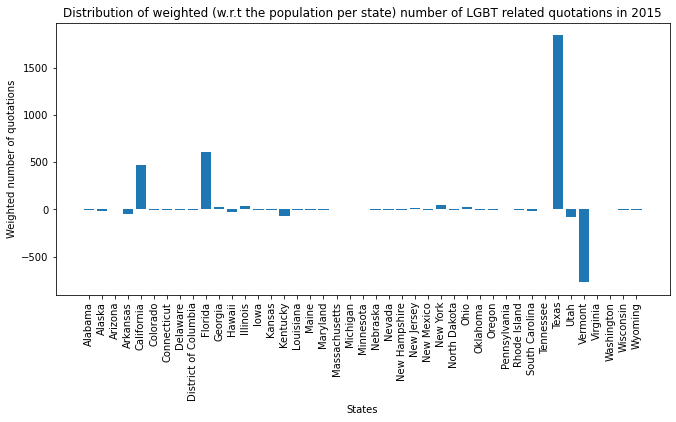

In [26]:
population_size_state_2015=population_size_state['2015']
weight2015=pd.merge(population_size_state_2015,merged2015,left_index=True, right_index=True)

# Weighted number of occurrences:

weight2015['weighted_numOccurrences']=weight2015['2015']*weight2015['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2015.index, weight2015.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2015')
plt.xticks(rotation = 90)
plt.show()

In [49]:
largest_2015=weight2015['weighted_numOccurrences'].nlargest(4)
largest_2015

Texas         1845.815172
Florida        606.039634
California     472.984074
New York        42.874252
Name: weighted_numOccurrences, dtype: float64

To get an insight into the kind of quotations we are working with:

In [22]:
merged.quotation.sample(10)

499    deputy assistant to the associate vice provost...
55     Fortune 500 is running shamelessly to endorse ...
157    Imagine, hypothetically, you had a gay florist...
795    I don't care [ about ] her gender. What I care...
725    I think it's important we have a sense of pers...
186    Imagine, hypothetically, you had a gay florist...
56     If a state chooses to adopt gay marriage, that...
6      The FDA's new policy continues the government'...
375    divide people on gay marriage. They divide peo...
98     No one has the right to force someone else to ...
Name: quotation, dtype: object

Visualisation of the number of quotations by states:

In [30]:
print(merged['state'].value_counts().to_markdown(headers=[]))

|:---------------------|----:|
| Texas                | 198 |
| Vermont              | 158 |
| Florida              |  91 |
| California           |  62 |
| Kentucky             |  51 |
| Illinois             |  31 |
| South Carolina       |  24 |
| New York             |  17 |
| Colorado             |  14 |
| Wisconsin            |  13 |
| Washington           |  12 |
| Iowa                 |  12 |
| Ohio                 |  11 |
| Arizona              |  11 |
| New Jersey           |  11 |
| Georgia              |  11 |
| Hawaii               |  10 |
| Kansas               |   9 |
| Maine                |   8 |
| Utah                 |   8 |
| Arkansas             |   8 |
| Virginia             |   7 |
| Louisiana            |   6 |
| Oregon               |   6 |
| Oklahoma             |   5 |
| Massachusetts        |   5 |
| Tennessee            |   5 |
| Alaska               |   5 |
| Nevada               |   4 |
| Maryland             |   4 |
| Minnesota            |   3 |
| Nebras

**Let's see what is the distribution of speakers per state on the matter of gay rights**

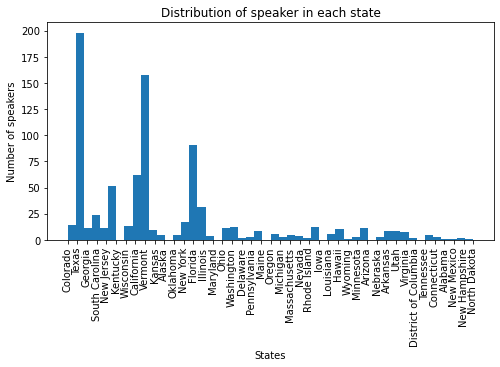

In [10]:
plt.figure(figsize=(8,4))
plt.hist(merged.state, bins= 50)
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state')
plt.xticks(rotation = 90)
plt.show()

Something interesting is to compare/plot the distribution of **different** speakers per state. Indeed, some speakers may talk a lot about the topic, including a bias in the above distribution. In this case, if a state shows a high number of quotations, it won't necessarely mean that the topic is related a lot in the given state.

Comparison of the number of quotations between the speaker with the highest number of "gay rights" related quotations and the one with the smallest number: 

In [31]:
per_speaker=pd.DataFrame(merged.groupby("speaker")['numOccurrences'].sum())
max_per_speaker=per_speaker['numOccurrences'].idxmax()
max_nber=per_speaker['numOccurrences'].max()
min_per_speaker=per_speaker['numOccurrences'].idxmin()
min_nber=per_speaker['numOccurrences'].min()
print("In 2015:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotations".format(min_nber))

In 2015: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotations


### For year 2016

In [35]:
dataframe16=pd.read_csv("data/df16.csv")
merged_ = pd.merge(dataframe16, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged16=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

merged16.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
25232,"They like to campaign as conservatives, but wh...",Tim Huelskamp,2016-07-30 01:00:18,1,['http://www.wnd.com/2016/07/conservative-figh...,Kansas
19641,It is my hope that the Republican majority wil...,Chris Coons,2016-02-23 08:38:01,3,['http://4029tv.com/politics/gop-again-cites-b...,Delaware
10816,"There's no question that with Saudi Arabia, th...",Lois Frankel,2016-04-20 23:32:52,32,['http://13wham.com/news/connect-to-congress/l...,Florida
25740,"As things stand, our current trade relationshi...",Brad Sherman,2016-04-28 21:03:46,1,['http://www.americanbazaaronline.com/2016/04/...,California
2931,I just couldn't be at peace with the idea that...,Marco Rubio,2016-08-31 03:41:10,2,['http://wflx.com/story/32933876/rubio-to-face...,Florida


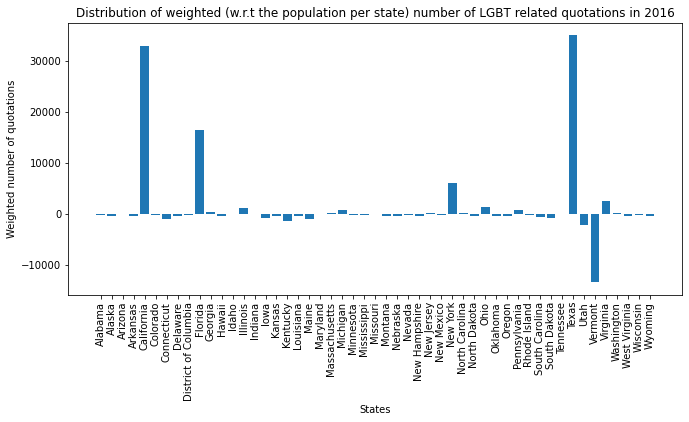

In [36]:
population_size_state_2016=population_size_state['2016']
merged2016=pd.DataFrame(merged16.groupby("state")['numOccurrences'].sum())
weight2016=pd.merge(population_size_state_2016,merged2016,left_index=True, right_index=True)

# weighted number of occurences:

weight2016['weighted_numOccurrences']=weight2016['2016']*weight2016['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2016.index, weight2016.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2016')
plt.xticks(rotation = 90)
plt.show()

In [50]:
largest_2016=weight2016['weighted_numOccurrences'].nlargest(4)
largest_2016

Texas         35088.226489
California    33064.440103
Florida       16523.068257
New York       6103.967253
Name: weighted_numOccurrences, dtype: float64

### For year 2017

In [37]:
dataframe17=pd.read_csv("data/df17.csv")
merged_ = pd.merge(dataframe17, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged17=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

merged17.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
52820,"We are hopeful they will reconsider, but eithe...",Chris Van Hollen,2017-09-25 12:01:00,1,['http://buzzfeed.com/zahrahirji/business-grou...,Maryland
50462,"In addition, as we move forward with a new FBI...",Tom Carper,2017-05-10 11:28:00,1,['http://www.delaware1059.com/news/sen-tom-car...,Delaware
28101,I think the Democrats cleaned our clock. I thi...,Lindsey Graham,2017-05-02 15:54:13,1,['http://www.breitbart.com/video/2017/05/02/li...,South Carolina
25925,"It's one thing to provide resources, but we've...",Bill Johnson,2017-10-27 20:27:50,1,['http://www.wfmj.com/story/36703799/trumbull-...,Ohio
2454,"But fortunately -- for most of us, anyway -- t...",Mitch McConnell,2017-06-16 14:38:38,1,['http://www.mo4ch.com/the-health-202-senate-i...,Kentucky


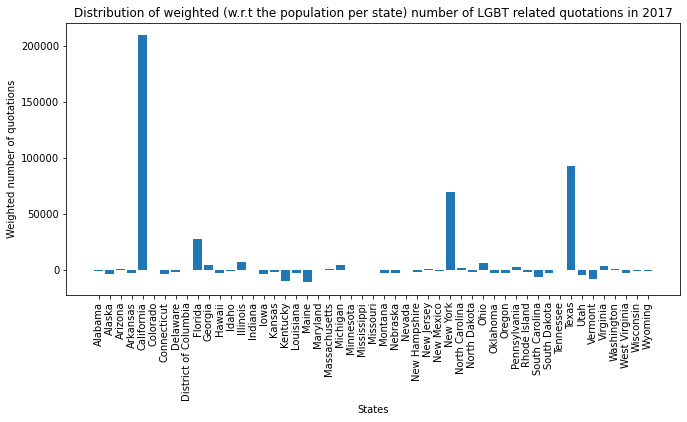

In [38]:
population_size_state_2017=population_size_state['2017']
merged2017=pd.DataFrame(merged17.groupby("state")['numOccurrences'].sum())
weight2017=pd.merge(population_size_state_2017,merged2017,left_index=True, right_index=True)

# weighted number of occurences:

weight2017['weighted_numOccurrences']=weight2017['2017']*weight2017['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2017.index, weight2017.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2017')
plt.xticks(rotation = 90)
plt.show()

In [51]:
largest_2017=weight2017['weighted_numOccurrences'].nlargest(4)
largest_2017

California    209311.623734
Texas          92916.348238
New York       69410.777603
Florida        28071.450339
Name: weighted_numOccurrences, dtype: float64

### For year 2018

In [39]:
dataframe18=pd.read_csv("data/df18.csv")
merged_ = pd.merge(dataframe18, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged18=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

merged18.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
50020,Educators and employers need to be working tog...,Raja Krishnamoorthi,2018-01-06 00:00:00,10,['http://www.business-standard.com/article/com...,Illinois
19696,Why should we be treated in such a humiliating...,Nancy Pelosi,2018-02-07 00:00:00,70,['http://abcnews.go.com/Politics/pelosi-surpas...,California
39027,"For decades, the people of King Cove have aske...",Lisa Murkowski,2018-01-23 13:57:56,1,['http://goldrushcam.com/sierrasuntimes/index....,Alaska
62808,The attacks on science and the scientific meth...,Bill Foster,2018-03-05 22:32:43,1,['http://www.the-scientist.com/?articles.view/...,Illinois
59698,It looks like the place is going to breathe a ...,Tom Cole,2018-12-30 02:50:00,1,['http://www.msn.com/en-us/news/politics/‘you-...,Oklahoma


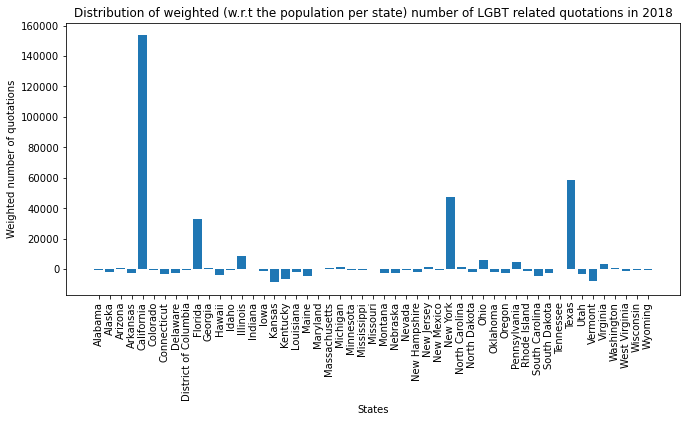

In [40]:
population_size_state_2018=population_size_state['2018']
merged2018=pd.DataFrame(merged18.groupby("state")['numOccurrences'].sum())
weight2018=pd.merge(population_size_state_2018,merged2018,left_index=True, right_index=True)

# weighted number of occurences:

weight2018['weighted_numOccurrences']=weight2018['2018']*weight2018['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2018.index, weight2018.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2018')
plt.xticks(rotation = 90)
plt.show()

In [52]:
largest_2018=weight2018['weighted_numOccurrences'].nlargest(4)
largest_2018

California    153580.693569
Texas          58929.135766
New York       47376.147729
Florida        33298.944822
Name: weighted_numOccurrences, dtype: float64

### For year 2019

In [41]:
dataframe19=pd.read_csv("data/df19.csv")
merged_ = pd.merge(dataframe19, politicians, on='speaker', how='inner').drop(columns=['Unnamed: 0'])
merged19=merged_.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

merged19.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
18691,"I don't want to lie to you. If I told you, mag...",Bernie Sanders,2019-10-01 19:01:38,1,['https://hotair.com/archives/john-s-2/2019/10...,Vermont
14707,We forecast that 2.3 billion gamers across the...,Alexandria Ocasio-Cortez,2019-01-25 02:16:48,1,['https://www.valuewalk.com/2019/01/alexandria...,New York
57117,And I am sure he will be a big asset to us for...,Paul Cook,2019-01-10 10:15:29,1,['https://www.wigantoday.net/sport/football/wi...,California
9691,disturbing picture of a president who has been...,Nancy Pelosi,2019-04-19 07:40:16,1,['https://www.kbc.co.ke/democrats-pressure-tru...,California
45595,The thing that drives me crazy about the DEP i...,Josh Gottheimer,2019-06-07 04:09:19,1,['http://www.njherald.com/20190607/gottheimer-...,New Jersey


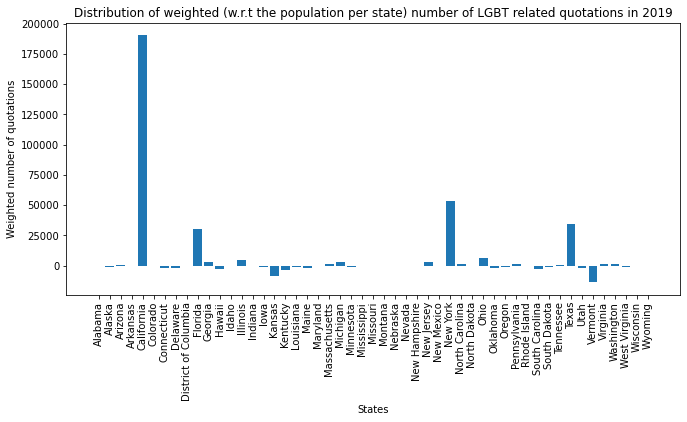

In [42]:
population_size_state_2019=population_size_state['2019']
merged2019=pd.DataFrame(merged19.groupby("state")['numOccurrences'].sum())
weight2019=pd.merge(population_size_state_2019,merged2019,left_index=True, right_index=True)

# weighted number of occurences:

weight2019['weighted_numOccurrences']=weight2019['2019']*weight2019['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2019.index, weight2019.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2019')
plt.xticks(rotation = 90)
plt.show()

In [53]:
largest_2019=weight2019['weighted_numOccurrences'].nlargest(4)
largest_2019

California    190443.042679
New York       53161.145203
Texas          33997.594897
Florida        30191.818652
Name: weighted_numOccurrences, dtype: float64

### For year 2020

In [43]:
dataframe20=pd.read_csv("data/df20.csv")
merged_ = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged_.drop(columns=['state_y', 'Unnamed: 0'])
merged20=merged20.rename(columns={"state_x": "state"})
merged20=merged20.drop(['quoteID', 'qids', 'probas', 'phase'], axis=1)

merged20.sample(5)

,quotation,speaker,date,numOccurrences,urls,state
192,Thinking I was out of the political spotlight ...,Aaron Schock,2020-03-05 18:02:20,1,['http://advocate.com/politics/2020/3/05/aaron...,Illinois
122,Transgender people everywhere deserve to live ...,Bernie Sanders,2020-04-01 21:15:08,1,['http://cnsnews.com/article/national/cnsnewsc...,Vermont
43,We need a president who will life up the voice...,Elizabeth Warren,2020-01-10 20:57:04,1,['http://cnsnews.com/article/washington/cnsnew...,Massachusetts
41,I will create a new grant program within the O...,Elizabeth Warren,2020-01-31 10:00:00,1,['http://www.out.com/commentary/2020/1/31/out-...,Massachusetts
150,For any candidate to be the nominee of the Dem...,Bernie Sanders,2020-03-07 07:30:01,1,['https://www.theguardian.com/us-news/2020/mar...,Vermont


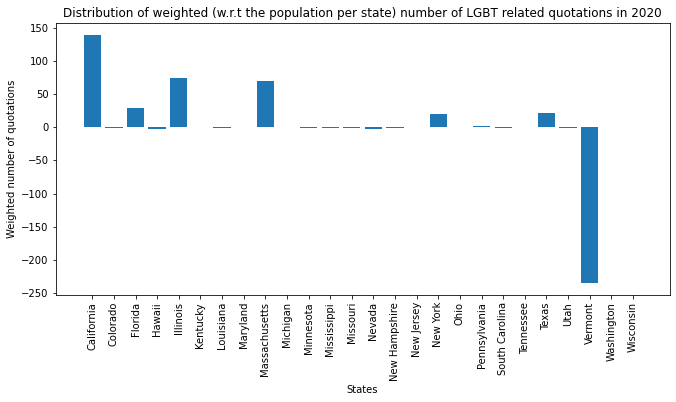

In [44]:
population_size_state_2020=population_size_state['2020']
merged2020=pd.DataFrame(merged20.groupby("state")['numOccurrences'].sum())
weight2020=pd.merge(population_size_state_2020,merged2020,left_index=True, right_index=True)

# weighted number of occurences:

weight2020['weighted_numOccurrences']=weight2020['2020']*weight2020['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2020.index, weight2020.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2020')
plt.xticks(rotation = 90)
plt.show()

In [54]:
largest_2020=weight2020['weighted_numOccurrences'].nlargest(4)
largest_2020

California       138.321950
Illinois          74.770031
Massachusetts     69.589012
Florida           28.992185
Name: weighted_numOccurrences, dtype: float64

In [18]:
print("Size of the data for 2020:",merged20.shape, "\nSize of the data we've got for 2015:", merged.shape)

Size of the data for 2020: (277, 6) 
Size of the data we've got for 2015: (844, 6)


We have the same number of features to compare, but way more data for 2015 (three times more). 
The quotes we work with are downloaded from Quotebank dataset, so here is an issue we can encounter with this website: the irregularities of available data depending on the year of study for example.

We observe that some quotations (=some rows) account for the same speaker, which creates a bias. For example, if a speaker talks a lot about this topic, the state from which he comes from will appear such as a state where the topic is important.  

### Comparison across years:

In [61]:
comparison=pd.DataFrame({"2015": largest_2015, "2016": largest_2016, "2017": largest_2017, 
                         "2018": largest_2018, "2019": largest_2019, "2020": largest_2020})
comparison

,2015,2016,2017,2018,2019,2020
California,472.984074,33064.440103,209311.623734,153580.693569,190443.042679,138.321950
Florida,606.039634,16523.068257,28071.450339,33298.944822,30191.818652,28.992185
Illinois,NaN,NaN,NaN,NaN,NaN,74.770031
Massachusetts,NaN,NaN,NaN,NaN,NaN,69.589012
New York,42.874252,6103.967253,69410.777603,47376.147729,53161.145203,NaN
Texas,1845.815172,35088.226489,92916.348238,58929.135766,33997.594897,NaN


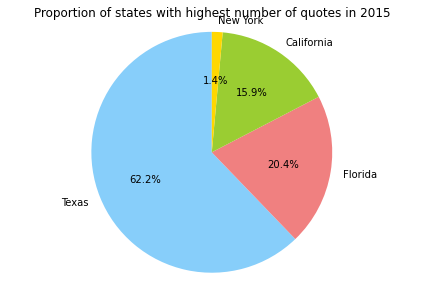

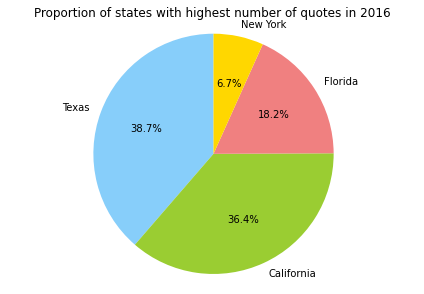

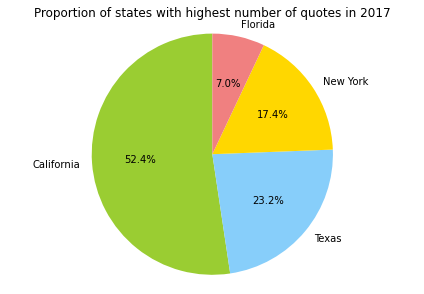

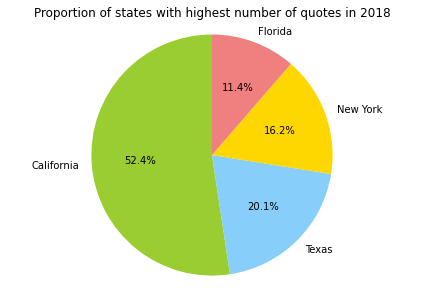

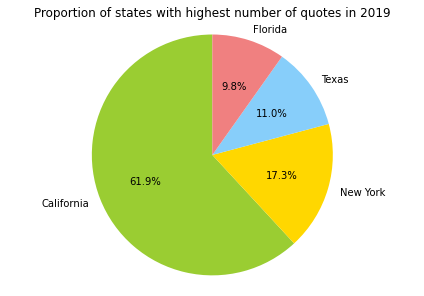

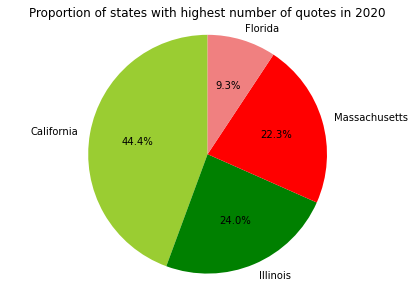

In [90]:
# by the use of pie charts:
largest_list=[largest_2015, largest_2016, largest_2017, largest_2018, largest_2019, largest_2020]
year=2015
for largest in largest_list:
    labels = largest.index
    sizes = largest.values
    colors = {'California':'yellowgreen', 'New York':'gold', 'Texas':'lightskyblue', 'Florida':'lightcoral',
              'Massachusetts':'red', 'Illinois':'green'}
    patches, texts, junk = plt.pie(sizes,labels=labels,startangle=90, autopct='%1.1f%%',
                                  colors=[colors[v] for v in largest.index])
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.title("Proportion of states with highest number of quotes in {}".format(year))
    year+=1
    plt.show()
    
    

Over the years it seems that the number of quotes in California stays prominent. From 2015 to 2020, Texas goes from the second place to out of the top four, while Illinois and Massachusetts arise in the top four in 2020. New York is also excluded from the top 4 in 2020 while it was occupying a bit less than 1/4 of the proportions until then, with a slight increase per year. For Florida, the proportions decrease by the half from 2015 to 2020. 
Of course, several questions arise? 
Did Massachusetts and Illinois arised because the other states decreased in the number of quotes or because these states increased in the number of quotes? Is it linked to a specific event? Why does California occupies such a spot in the distribution over the years? Is it due to politician(s)? If so, is it because they stand for the lgbtq+ rights or the opposite? Is it because there is a big lgbtq+ community in California?

## Exploration of merged data for 2020:

In [91]:
print(merged20['state'].value_counts().to_markdown(headers=[]))

|:---------------|----:|
| Massachusetts  | 109 |
| Vermont        |  60 |
| California     |  23 |
| Illinois       |  21 |
| Colorado       |  10 |
| Florida        |   8 |
| New York       |   6 |
| Texas          |   6 |
| Missouri       |   5 |
| Nevada         |   4 |
| Wisconsin      |   3 |
| Minnesota      |   3 |
| Hawaii         |   3 |
| Louisiana      |   2 |
| Maryland       |   2 |
| Utah           |   2 |
| Mississippi    |   1 |
| Ohio           |   1 |
| Kentucky       |   1 |
| Michigan       |   1 |
| South Carolina |   1 |
| New Jersey     |   1 |
| Pennsylvania   |   1 |
| Washington     |   1 |
| Tennessee      |   1 |
| New Hampshire  |   1 |


In [92]:
per_speaker20=pd.DataFrame(merged20.groupby("speaker")['numOccurrences'].sum())
max_per_speaker20=per_speaker20['numOccurrences'].idxmax()
max_nber20=per_speaker20['numOccurrences'].max()
min_per_speaker20=per_speaker20['numOccurrences'].idxmin()
min_nber20=per_speaker20['numOccurrences'].min()
print("In 2020:", "\nThe politician with the highest number of LGBT related quotations is {}".format(max_per_speaker), 
      "with {} quotations".format(max_nber), "\nThe one with the smallest number of LGBT related quotations is {}".format(min_per_speaker),
     "with {} quotation".format(min_nber))


In 2020: 
The politician with the highest number of LGBT related quotations is Bernie Sanders with 975 quotations 
The one with the smallest number of LGBT related quotations is Adrian Smith with 1 quotation


**Now, we want to see the distribution of hatecrime due to sexual orientation in each state. We focus, for the moment, on data from 2015**

In [94]:
#Upload data on hatecrime:
#We only keep data relevant for our subject, that is sexual orientation and gender identity
hc2015=pd.read_csv('data/hatecrime2015.csv')
hc2015.sort_index()
hc2015=hc2015.drop(columns=['Agency Type', 'Race/\nEthnicity/\nAncestry', 'Religion','Disability','Gender', '1st\nquarter'
                    , '2nd\nquarter','3rd\nquarter', '4th\nquarter', 'Agency name' ])

In [95]:
#remove unrelevant line spotted in the file
for i in range(hc2015.shape[0]):
    if (hc2015.State.loc[i]=='3 Includes one incident reported with more than one bias motivation.'):
        hc2015.State.loc[i]='NaN'

In [96]:
#The state value is filled once and then only NaN value for all the following rows until new state, therefore we fill in
# the NaN value with the relevant State 
hc=hc2015.fillna(method='ffill', axis=0)
hc=hc.rename(columns = {'Sexual\norientation': 'sexual_orientation', 'Gender\nIdentity': 'gender_identity'})

In [97]:
#last lines are non valid with respect to our study, therefore we drop them
hc=hc.drop(labels=[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], axis=0)

In [98]:
nb_hc=hc.groupby(['State']).sum()

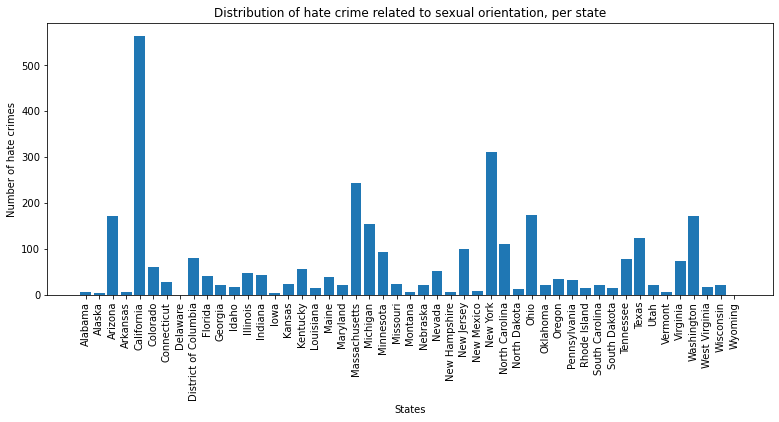

In [99]:
#let's plot the distribution of hate crime related to sexual orientation, per state
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.sexual_orientation)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to sexual orientation, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that California has the highest number of hate crime related to sexual orientation. It is interesting to point it out as we have seen in the previous plot that California has lots of speakers on the matter of gay rights. 

Indeed, after looking up on Internet, hate crimes with a sexual orientation bias are the second most common type of hate crime over 2006-2015 in California.

Let's check if we have a bias due to a high number of speakers in California or to a politician well known for its implication in the LGBT topic:

In [100]:
#is there a bias? let's have a look at the number of occurrences for speakers in California:
california=merged[merged['state']=='California']
california_speaker=california.speaker.tolist()
#keep only one of each duplicates
california_speaker=list(set(california_speaker))
speaker_california=per_speaker.loc[california_speaker]
speaker_california

,numOccurrences
speaker,
Jackie Speier,17
Barbara Lee,7
Karen Bass,2
Ami Bera,1
Duncan Hunter,15
Loretta Sanchez,1
Dianne Feinstein,3
Ted Lieu,17
Mark Takano,1


In [101]:
x=975/speaker_california.numOccurrences.max()
print("The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975",
     "\nThe highest value from the list above is smaller by a factor: {}.".format(x), 
      "Thus we conclude there is no bias for California.")


The maximum number of occurrences per speaker was attributed to Bernie Sanders: 975 
The highest value from the list above is smaller by a factor: 32.5. Thus we conclude there is no bias for California.


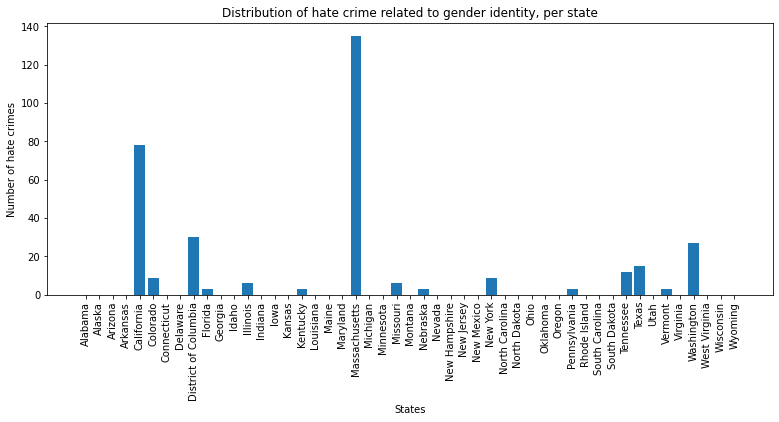

In [102]:
#same plot but for gender identity
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.gender_identity)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of hate crime related to gender identity, per state')
plt.xticks(rotation = 90)
plt.show()

We can see that gender identity related hate crime are not present in lots of state. It is probably because in 2015, we were talking less about gender identity than nowadays. Therefore, probably less people reported it as gender identity hate crime.
Nevertheless, we can see that in Massachussetts and California, there have been important number of **reported** agressions with respect to the other states. For Massachussetts, there are approximately the same number of hate crime due to gender identity and to sexual orientation, therefore the whole lgbtqa+ community is very much targeted. 

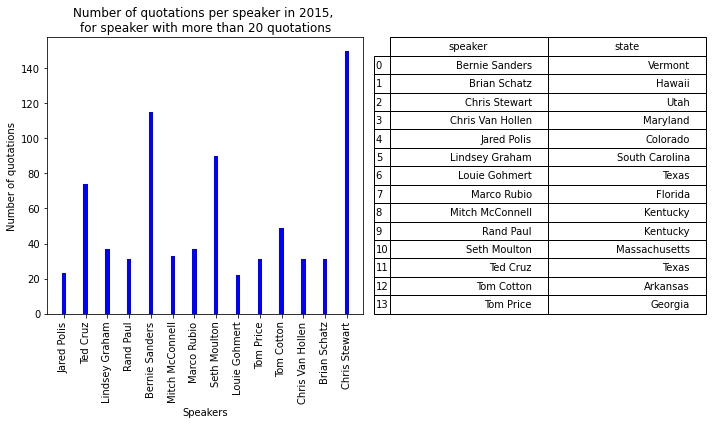

In [103]:
#As we have a majority of speakers with very few quotations, and a minority with many quotations, 
#we set a threshold for the visualization to get rid of the high number of speakers with a few quotations only
merged_quot= merged[merged['numOccurrences']>20]
speaker_quot=((merged[merged['numOccurrences']>20]).groupby("speaker")['numOccurrences'].sum()).index.tolist()
speaker_quot=pd.DataFrame({'speaker': speaker_quot})
speaker_quot.sample(5)

#Display the states corresponding to these speakers, to understand if there are bias:
speaker_state=pd.merge(speaker_quot, politicians, left_on='speaker', right_on='speaker', how='inner')

#visualization of the number of quotations per speaker, with a minimum of 20 quotations:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(122)
font_size = 14
bbox = [0, 0, 1, 1]
ax1.axis('off')
mpl_table = ax1.table(cellText=speaker_state.values, rowLabels=speaker_state.index, bbox=bbox, colLabels=speaker_state.columns)

ax2 = fig.add_subplot(121)
ax2.bar(merged_quot.speaker, merged_quot.numOccurrences, color='blue', width=0.2)
ax2.set_xlabel('Speakers')
ax2.set_ylabel('Number of quotations')
ax2.set_title('Number of quotations per speaker in 2015, \nfor speaker with more than 20 quotations')
plt.xticks(rotation=90)
plt.show()

**Bernie Sanders** and **Chris Stewart** are talking a lot about lgbtq+ topics. As we can see in the table, they are the speakers for Vermont and Utah. We also saw previously that Vermont has high number of quotations, so it could be a bias due to the presence of Bernie Sanders who is really involved in this topic.

In [104]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state').agg({'numOccurrences' : sum})

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)


,numOccurrences,numQuotations
state,,
Vermont,980,158
Texas,625,198
Florida,312,91
Kentucky,258,51
Utah,165,8
California,104,62
Massachusetts,95,5
Arkansas,95,8
South Carolina,92,24


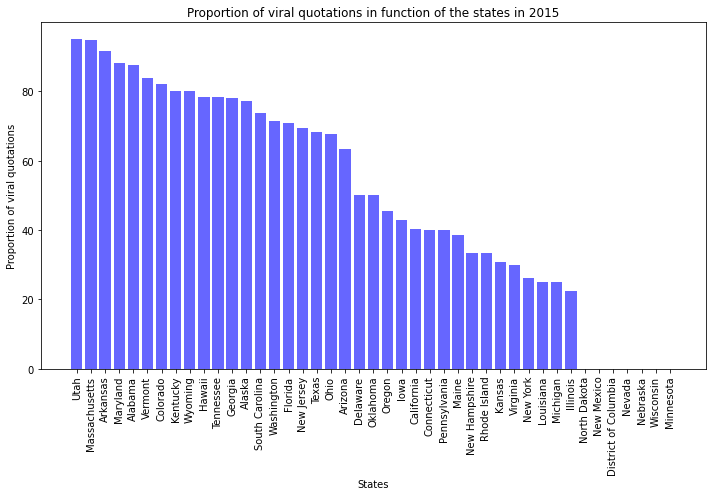

In [105]:
# are there viral quotations?
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100
grouped_by_state=grouped_by_state.sort_values(by= 'proportional_numQuotations', ascending=True)
plt.figure(figsize=(10,7))
plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6 )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.title("Proportion of viral quotations in function of the states in 2015")
plt.show()

This graph presents the proportion of viral quotations for each state.
In fact, we compute the percentage of the number of different quotations over the total number of occurences of quotations for each state and displays 100 minus this proportion to get the proportion of viral quotations. 

If there is a low number of quotations in a specific state and the total number of occurences is very high, this means that these quotations were widely quoted by other speakers or in media supports such as articles and that we talked a lot about it. We assume that if we discuss and mention many times a quotation, it went **viral** and may be polemical.

For example, in Utah,the number of different quotations is very low. This means there is a high number of occurences for just a few different quotations. We see in the previous table that it is on a significant number of occurences. Concretely, it means it is probably a polemical sentence.

### What about the lgbt population itself?

Note that here we will be working with datasets from 2021, assuming that these kinds of datasets did not really evolve across the years.

In [106]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#pre-processing steps:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum() #in case there are duplicates of states across rows
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
46,TENNESSEE,"6,770,010","223,000",3.500%,29.00%,18.100%
21,MAINE,"1,338,404","60,000",4.900%,21.00%,13.800%
25,MINNESOTA,"5,611,179","210,000",4.100%,28.00%,16.500%
41,PENNSYLVANIA,"12,807,060","490,000",4.100%,27.00%,15.900%
7,CONNECTICUT,"3,572,665","133,000",3.900%,20.0%,17.00%
13,HAWAII,"1,420,491","59,000",4.600%,30.0%,15.800%
27,MISSOURI,"6,126,452","217,000",3.800%,26.00%,17.300%
40,OREGON,"4,190,713","207,000",5.600%,23.00%,16.300%
55,WYOMING,"577,737","18,000",3.300%,28.00%,24.700%
11,GEORGIA,"10,519,475","425,000",4.500%,27.00%,19.600%


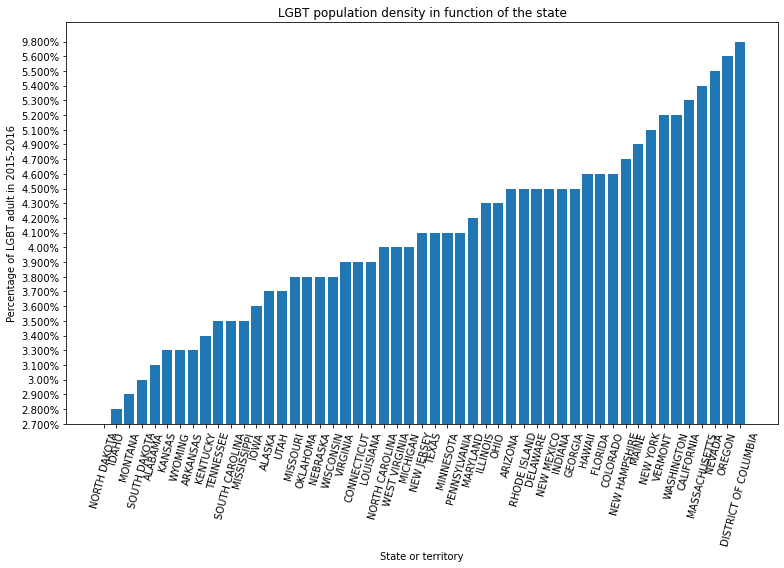

In [108]:
# Plot
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(11,8))
plt.bar(lgbtpopulation['STATE'],lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

We can see that North Dakota is the state with the smallest percentage of reported LGBT adults for the years 2015-2016, while in Oregon or in the District of Colombia the density is way higher. Note that these data are probably obtained from surveys, therefore it does not necessary correspond to the reality because some people may not have tell the truth nor filled in the form. 
In the previous analysis we didn't notice anything particular (like very high number of quotations) about North Dakota, Oregon and District of Columbia.  

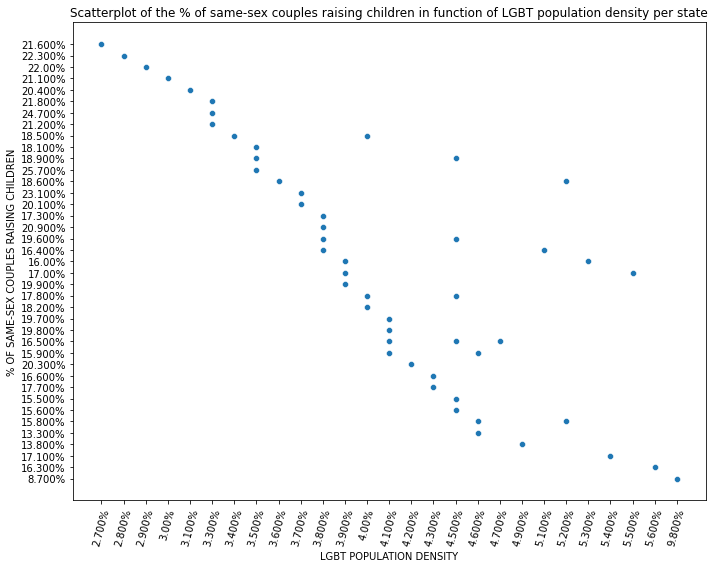

In [110]:
# Correlation between LGBT population density and percentage of same-sex couples raising children
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

It seems that we have a negative correlation between these two categories. It means that for an increase in LGBT population density there is a decrease in the percentage of same-sex couple raising children and inversely. 
In our opinion, this result is surprising. We would have expected to see more same-sex couples raising children where the lgbt population density is higher. One possible explanation could be that where the lgbt population density is higher we would find more young people who do not have children yet.

**As our previous analysis raised a surprise, let's analyze another dataset to understand how trustable lgbtpopulation file was:**

In [111]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', 
                         '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": 
                                        "Percentage of LGBT adult in 2015-2016", 
                                        "2016 transgender adult percentage estimate[2]": 
                                        "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) #just to check that it is well ordered throughout the dataframe


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


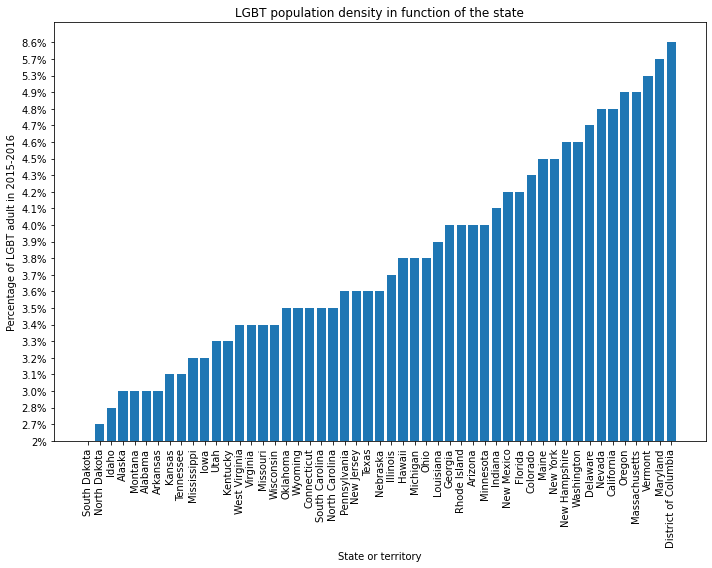

In [113]:
# Plot
lgbtsummary=lgbtsummary.sort_values(by='Percentage of LGBT adult in 2015-2016', axis=0)
plt.figure(figsize=(10,8))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

It shows similar results as in lgbtpopulation (first plot): our data seem to be trustable.

## Let's focus on a different spectrum of speakers:

In the following, we will analyze a wider spectrum of speakers to get a broad idea about this topic.

In [117]:
# Dataframe with american speakers in Quotebank and their information
americans = pd.read_csv("data/americans.csv")
americans.head()

,Unnamed: 0,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,1,['George Walker Bush' 'Bush Jr.' 'Dubya' 'GWB'...,['+1946-07-06T00:00:00Z'],['Q30'],['Q6581097'],1395142029,NaN,NaN,['Q82955' 'Q15982858' 'Q18814623' 'Q1028181' '...,['Q29468'],NaN,Q207,George W. Bush,['Q327959' 'Q464075' 'Q3586276' 'Q4450587'],item,['Q329646' 'Q682443' 'Q33203']
1,2,['Neil Percival Young' 'Shakey' 'Godfather of ...,['+1945-11-12T00:00:00Z'],['Q16' 'Q30'],['Q6581097'],1395459626,NaN,NaN,['Q177220' 'Q488205' 'Q2526255' 'Q639669' 'Q18...,NaN,NaN,Q633,Neil Young,NaN,item,NaN
2,3,['Mary Louise Streep' 'Meryl Louise Streep' 'S...,['+1949-06-22T00:00:00Z'],['Q30'],['Q6581072'],1388232380,NaN,NaN,['Q10800557' 'Q2259451' 'Q10798782' 'Q2405480'...,['Q29552'],NaN,Q873,Meryl Streep,NaN,item,['Q7066']
3,4,NaN,['+1947-10-01T00:00:00Z'],['Q30'],['Q6581097'],1291441158,NaN,NaN,['Q3630699' 'Q54845077'],NaN,NaN,Q1381,Dave Arneson,NaN,item,NaN
4,5,['Ashton James Eaton'],['+1988-01-21T00:00:00Z'],['Q30'],['Q6581097'],1395347414,['Q49085'],NaN,['Q14605941'],NaN,NaN,Q1789,Ashton Eaton,NaN,item,NaN


In [118]:
# Dataframes with quotes
df15_all = pd.read_csv("data/df15_all.csv")
df16_all = pd.read_csv("data/df16_all.csv")
df17_all = pd.read_csv("data/df17_all.csv")
df18_all = pd.read_csv("data/df18_all.csv")
df19_all = pd.read_csv("data/df19_all.csv")
df20_all = pd.read_csv("data/df20_all.csv")

In [119]:
speakers15 = df15_all.speaker
speakers16 = df16_all.speaker
speakers17 = df17_all.speaker
speakers18 = df18_all.speaker
speakers19 = df19_all.speaker
speakers20 = df20_all.speaker

speakers = [speakers15, speakers16, speakers17, speakers18, speakers19, speakers20]

In [120]:
total15 = df15_all.shape[0]
total16 = df16_all.shape[0]
total17 = df17_all.shape[0]
total18 = df18_all.shape[0]
total19 = df19_all.shape[0]
total20 = df20_all.shape[0]

totals = [total15, total16, total17, total18, total19, total20]

In [121]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

#### Political Party of Speakers

In [123]:
# Create a dataframe with the counts of each political party QID for each year
pol_party = pd.DataFrame()
for i, s in enumerate(speakers):
    parties = pd.DataFrame(americans[americans.label.isin(s)].party)
    parties.party = parties.party.astype(str)
    parties.party = parties.party.map(lambda x: x.lstrip("['").rstrip("]'"))
    parties.party = parties.party.map(lambda x: x.replace("' '", ' '))
    parties = parties[~(parties.party == 'nan')]
    parties = parties.value_counts().head(10)
    parties = pd.DataFrame(parties).reset_index()
    parties.columns = ['qid', 'ct']
    parties['year'] = i+2015
    pol_party = pol_party.append(parties)
pol_party.head(3)

,qid,ct,year
0,Q29552,845,2015
1,Q29468,620,2015
2,Q29468 Q29552,18,2015


In [124]:
# Create a dataframe with the political party QIDs and their labels
qids = ['Q29552', 'Q29468', 'Q29468 Q29552', 'Q29552 Q29468', 'Q1937395 Q29552',
       'Q5020399', 'Q327591']
labels = ['democrat', 'republican', 'democrat/republican', 'democrat/republican', 'minnesota democrat-farmer-labor', 'democrat', 'independent']

data = list(zip(qids, labels))
party_QID = pd.DataFrame(data, columns = ['qid', 'party'])
party_QID.head(3)

,qid,party
0,Q29552,democrat
1,Q29468,republican
2,Q29468 Q29552,democrat/republican


In [125]:
# Merge the two dataframes to get the labels and the counts together
merged_party = pd.merge(pol_party, party_QID)
merged_party.head(3)

,qid,ct,year,party
0,Q29552,845,2015,democrat
1,Q29552,660,2016,democrat
2,Q29552,932,2017,democrat


#### Comparing the number of quotes about gay rights from democrats and republicans for all years

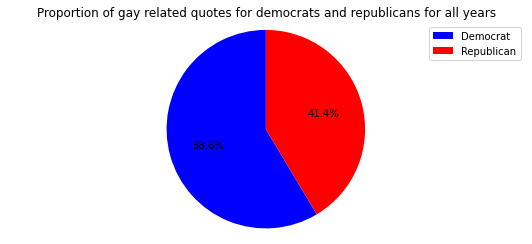

In [126]:
# Plot
pie_chart = merged_party.drop(['qid', 'year'], axis = 1).groupby('party').sum().sort_values(by = 'ct', ascending=False).head(2)
pie_counts = pie_chart['ct']
pie_labels = pie_chart.index

labels = pie_labels.str.title()
sizes = pie_counts
colors = ['blue', 'red']
patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title("Proportion of gay related quotes for democrats and republicans for all years")
plt.show()

The democrats represent 58.6% of quotes while the republicans 41.4%. In other terms, democrats tend to talk more about gay topics. 

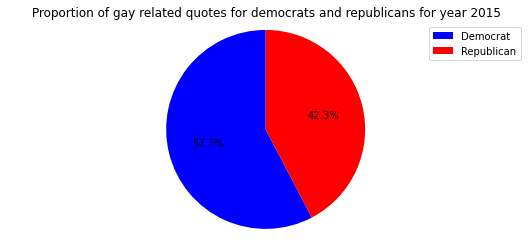

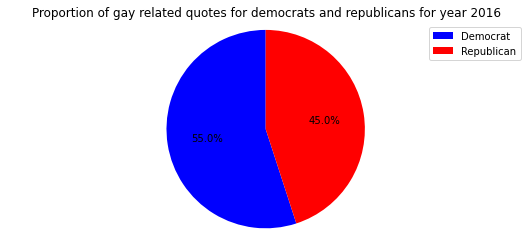

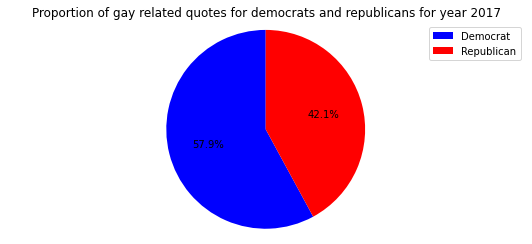

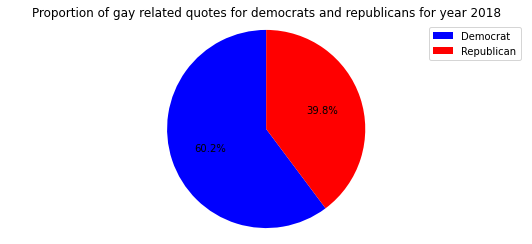

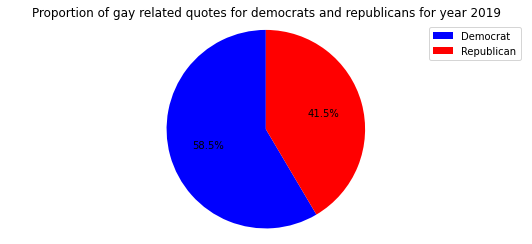

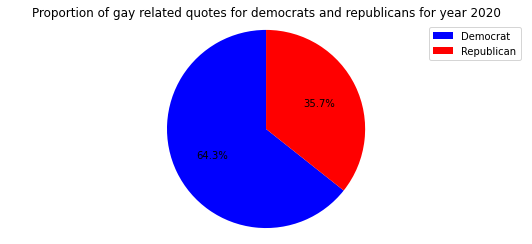

In [129]:
# Looks at each year individually:
for yr in years:
    piechart = merged_party[(merged_party.year == yr)].head(2)
    pie_counts = piechart.ct
    pie_labels = piechart.party

    labels = pie_labels.str.title()
    sizes = pie_counts
    colors = ['blue', 'red']
    patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.title("Proportion of gay related quotes for democrats and republicans for year {}".format(yr))
    plt.show()

These charts don't tell us much, however we can see that between year 2016 and 2020 there was a 10% increase in gay related quotes for democrats implying an almost 10% decrease for the republicans.

### Occupations of speakers

In [131]:
# Create a dataframe with the most common occupations of speakers for each year (for quotes related to gay rights)
occs = pd.DataFrame()
for i, s in enumerate(speakers):
    occupations = pd.DataFrame(americans[americans.label.isin(s)].occupation)
    occupations['occupation'] = occupations['occupation'].astype(str)
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.lstrip("['").rstrip("]'"))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.replace("' '", ' '))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.replace("'\n '", ' '))
    occupations['occupation'] = occupations['occupation'].map(lambda x: x.split())
    occupations_list = list(itertools.chain(occupations['occupation']))
    occupations_list  = pd.DataFrame([item for sublist in occupations_list for item in sublist], columns = ['qid'])
    occupations_list = occupations_list[~(occupations_list == 'nan')]
    o = occupations_list.value_counts().head(45)
    o = pd.DataFrame(o).reset_index()
    o.columns = ['qid', 'ct']
    o['year'] = i+2015
    occs = occs.append(o)
occs.head(3)

,qid,ct,year
0,Q82955,1376,2015
1,Q33999,1147,2015
2,Q36180,943,2015


In [133]:
# Create a dataframe of the QIDs and labels for occupations
qids = ['Q82955', 'Q33999', 'Q36180', 'Q10798782', 'Q10800557', 'Q1930187',
       'Q19204627', 'Q28389', 'Q177220', 'Q40348', 'Q3282637', 'Q2405480',
       'Q639669', 'Q2526255', 'Q3665646', 'Q578109', 'Q10871364', 'Q2259451',
       'Q36834', 'Q43845', 'Q488205', 'Q6625963', 'Q1622272', 'Q4610556',
       'Q753110', 'Q855091', 'Q183945', 'Q245068', 'Q2722764', 'Q947873',
       'Q482980', 'Q937857', 'Q33231', 'Q131524', 'Q5137571', 'Q49757',
       'Q201788', 'Q37226', 'Q11774891', 'Q8246794', 'Q19509201', 'Q81096', 'Q1028181', 'Q483501', 'Q15077007']
labels = ['politician', 'actor', 'writer', 'actor', 'actor', 'journalist', \
          'american football player', 'screenwriter', 'singer', 'lawyer', 'film producer', 'actor', \
          'musician', 'film director', 'basketball player', 'television producer', 'baseball player', 'actor', \
          'composer', 'businessperson', 'singer', 'novelist', 'professor', 'model', \
          'songwriter', 'guitarist', 'record producer', 'comedian', 'radio personality', 'television presenter', \
          'author', 'football player', 'photographer', 'entrepreneur', 'basketball coach', 'poet', \
          'historian', 'teacher', 'ice hockey player', 'blogger', 'LGBTI rights activist', 'engineer', 'painter', \
          'artist', 'podcaster']
data = list(zip(qids, labels))
occupation_QID = pd.DataFrame(data, columns = ['qid', 'occupation'])
occupation_QID.head(3)

,qid,occupation
0,Q82955,politician
1,Q33999,actor
2,Q36180,writer


In [135]:
# Merge the two dataframes
merged_occ = pd.merge(occs, occupation_QID)
merged_occ = merged_occ.drop('qid', axis=1)
merged_occ.head(3)

,ct,year,occupation
0,1376,2015,politician
1,1123,2016,politician
2,1545,2017,politician


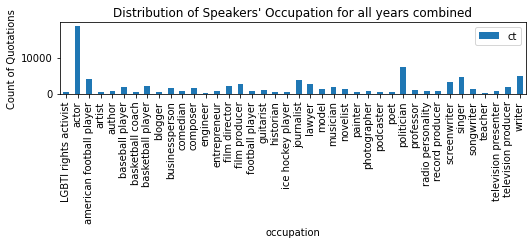

In [136]:
# Distribution of genders for all years
barchart_all = merged_occ.drop(['year'], axis=1).groupby('occupation').sum().reset_index()
barchart_all.plot.bar(x='occupation', y='ct', rot=90)
plt.title("Distribution of Speakers' Occupation for all years combined")
plt.ylabel("Count of Quotations")
plt.show()

From this first plot, we can see that the 'actor' occupation seems to be prominent in terms of speakers. In our opinion this makes sense for different reasons:
- actors often/sometimes have to play the role of a lgbtqia+ person
- actors are often quoted in the media in case of a coming out or an opinion 

In [138]:
# top10 of occupations talking the most of lgbt topics
top10 = merged_occ.drop(['year'], axis = 1).groupby('occupation').sum().sort_values(by = 'ct', ascending=False).head(10)
other_ct = merged_occ.ct.sum() - top10.ct.sum()
top10.loc['other'] = other_ct
top10

,ct
occupation,
actor,18852
politician,7386
writer,4886
singer,4527
american football player,4107
journalist,3670
screenwriter,3234
film producer,2696
lawyer,2634


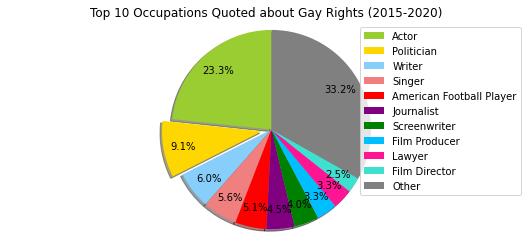

In [139]:
# Plot
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = top10.index.str.title()
sizes = top10.ct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'purple', 'green', 'deepskyblue', 'deeppink', 'turquoise', 'grey']
patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, explode=explode, shadow=True, autopct='%1.1f%%', pctdistance=0.8) 
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title("Top 10 Occupations Quoted about Gay Rights (2015-2020)")
plt.show()

Here is a more meaningful representation of the occupations. We can clearly see the decreasing order and prominence of some occupations. Indeed, actors are clearly the prominent, quite far behind are the politicians and the other occupations are way less represented. One could find surprising that politicians represent 9.1% while actors represent 23.3%. Politicians are the ones who can apply laws and create change, in both directions, depending on the opinion. So we could ask ourselves if this result is due to our data which might not be exhaustive or if it is real. In the last case, another question arises: why do politicians talk less about this topic? Is it a taboo matter? Is it because they should only speak to state new reforms? Finally, 33% belong to the 'Other' category. This could indicate that our data are not that reliable and it could be an answer to the question 'why do politicians talk less about this topic?'.

### Focus on gender per speaker

In [140]:
# Create a dataframe with the gender QIDs and their labels
qids = ['Q6581097', 'Q6581072', 'Q1052281', 'Q48270', 'Q2449503', 'Q1097630', 'Q18116794', \
                           'Q859614', 'Q27679766', 'Q15145779', 'Q12964198', 'Q6581072 Q48270', \
       'Q1097630 Q48270', 'Q6581097 Q18116794', 'Q1052281 Q6581097', 'Q18116794 Q6581097', \
       'Q27679766 Q859614', 'Q15145778', 'Q1984232', 'Q48279', 'Q48279 Q1097630', 'Q505371', \
       'Q48270 Q505371', 'Q189125', 'Q6581097 Q189125', 'Q48270 Q6581072', 'Q48270 Q12964198', \
       'Q1097630 Q48279']
labels = ['male', 'female', 'transgender female', 'non-binary', 'transgender male', \
                           'intersex', 'gender fluid', 'bigender', 'transmasculine', 'cisgender female', \
                           'gender queer', 'female non-binary', 'intersex non-binary', 'gender fluid male', \
         'male transgender female', 'gender fluid male', 'transmasculine bigender', 'cisgender male', 'shemale', 'third gender', \
         'intersex third gender', 'agender', 'non-binary agender', 'transgender person', 'male transgender person', \
         'female non-binary', 'gender queer non-binary', 'intersex third gender']
data = list(zip(qids, labels))
gender_QID = pd.DataFrame(data, columns = ['str_qid', 'gender'])
gender_QID.head()

,str_qid,gender
0,Q6581097,male
1,Q6581072,female
2,Q1052281,transgender female
3,Q48270,non-binary
4,Q2449503,transgender male


In [141]:
# For each year, count the number of quotes per gender, add the year and total number of quotes as other columns
counts_gender = pd.DataFrame()
for i, s in enumerate(speakers):
    counts_tmp = pd.DataFrame(americans[americans.label.isin(s)].gender.value_counts()).reset_index()
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.lstrip("['").rstrip("]'"))
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.replace("' '", ' '))
    counts_tmp['index'] = counts_tmp['index'].str.split()
    counts_tmp = counts_tmp.rename(columns = {'index': 'qid', 'gender': 'ct'})
    counts_tmp['str_qid'] = counts_tmp['qid'].apply(lambda x: " ".join(x))
    counts_tmp['year'] = years[i]
    counts_tmp['total_quotes'] = totals[i]
    counts_gender = counts_gender.append(counts_tmp)
    counts_gender = counts_gender.drop('qid', axis=1)
    
counts_gender.head()

,ct,str_qid,year,total_quotes
0,6997,Q6581097,2015,23591
1,2111,Q6581072,2015,23591
2,68,Q1052281,2015,23591
3,22,Q48270,2015,23591
4,20,Q2449503,2015,23591


In [142]:
# Merge the counts and gender dataframes to get the gender labels
merged_gender = pd.merge(counts_gender, gender_QID, on='str_qid')
merged_gender = merged_gender[~merged_gender.gender.isnull()]
merged_gender.head()

,ct,str_qid,year,total_quotes,gender
0,6997,Q6581097,2015,23591,male
1,5318,Q6581097,2016,15092,male
2,7768,Q6581097,2017,27336,male
3,7929,Q6581097,2018,27043,male
4,7123,Q6581097,2019,25926,male


In [143]:
# Look at the counts on a log scale
merged_gender['logcount'] = np.log(merged_gender.ct.astype(float))
# Only look at genders with a positive count
merged_gender_bar = merged_gender[merged_gender.logcount > 0]

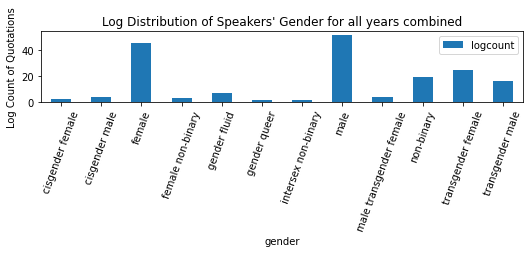

In [144]:
# Distribution of genders for all years
barchart_all = merged_gender_bar.drop(['str_qid', 'total_quotes', 'ct', 'year'], axis=1).groupby('gender').sum().reset_index()
barchart_all.plot.bar(x='gender', y='logcount', rot=70)
plt.title("Log Distribution of Speakers' Gender for all years combined")
plt.ylabel("Log Count of Quotations")
plt.show()

As we can see males seem to be the one talking the more about lgbtqia+ topics. Female are close. But there is a gap with the genders belonging to this community. Is it because people in this community sometimes suffer from a lack of visibility in the media for e.g? Is it because our data contain a bias? Is it because some speakers in the category 'female' or 'male' could belong to lgbtq+ categories but didn't state this? Or is it because these communities are way smaller? 

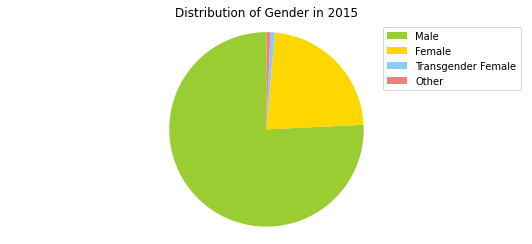

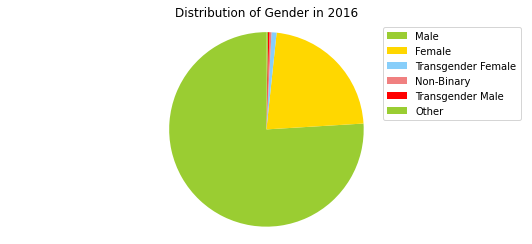

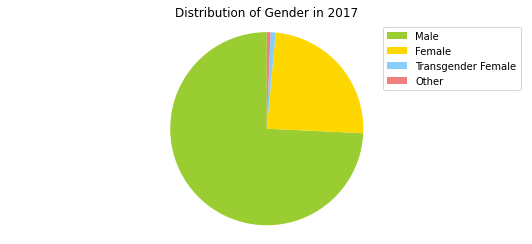

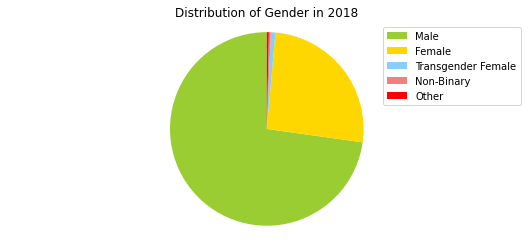

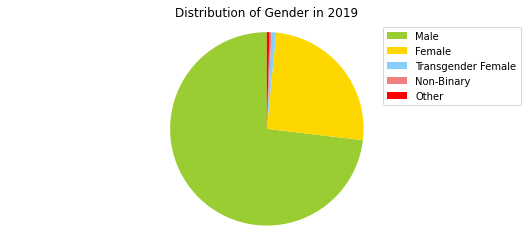

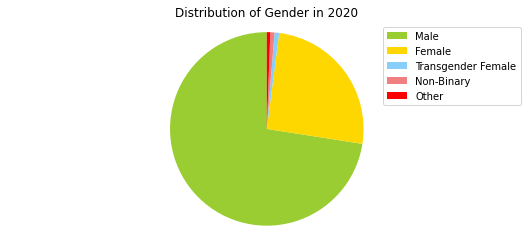

In [145]:
# Pie Charts of Gender by Year:
for yr in years:
    piechart = merged_gender[(merged_gender.year == yr) & (merged_gender.ct.astype(float)/merged_gender.total_quotes.astype(float) > 0.001)]
    pie_counts = piechart.ct
    pie_labels = piechart.gender

    pie_counts = pie_counts.append(pd.Series(merged_gender.ct[(merged_gender.year == yr) & ~(merged_gender.ct.astype(float)/merged_gender.total_quotes.astype(float) > 0.001)].sum()))
    pie_labels = pie_labels.append(pd.Series('Other'))

    labels = pie_labels.str.title()
    sizes = pie_counts
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title("Distribution of Gender in " + str(yr))
    plt.tight_layout()
    plt.show()

It seems that the distributions did not change over the years. 

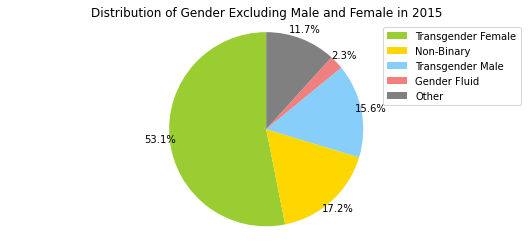

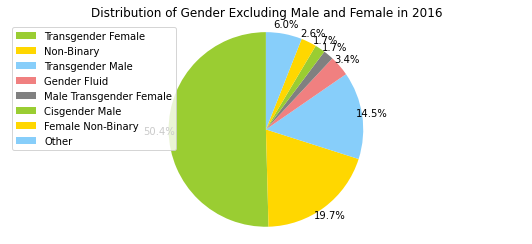

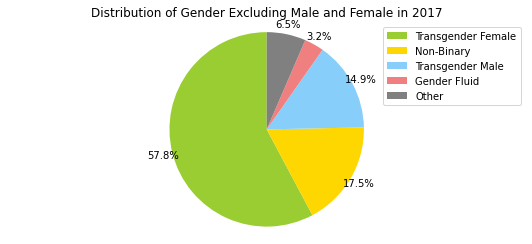

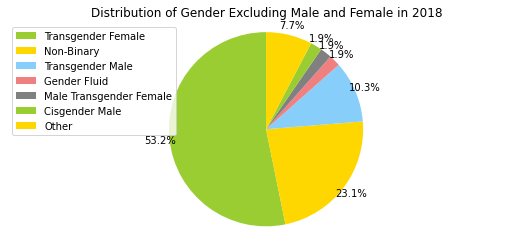

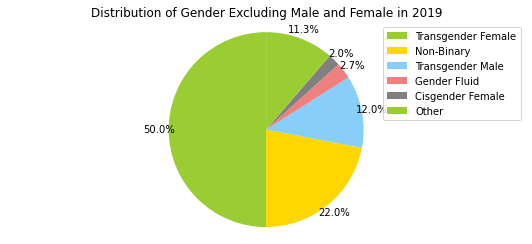

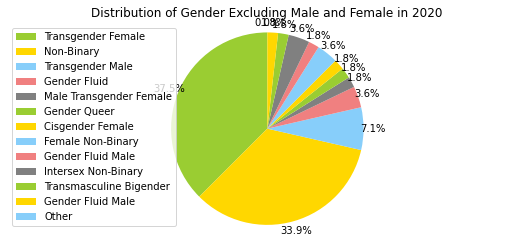

In [146]:
# Look at distribution ignoring male and female
# See significantly more genders in 2020
for yr in years:
    without_mf = merged_gender[(merged_gender.year == yr) & ~(merged_gender.gender.isin(['male', 'female']))]
    piechart = without_mf[without_mf.ct.astype(float)/without_mf.total_quotes.astype(float) > 0.0001]
    other_ct = without_mf.ct.sum() - piechart.ct.sum()
    piechart = piechart.drop(['str_qid', 'year', 'logcount', 'total_quotes'], axis=1).set_index('gender')
    piechart.loc['other'] = other_ct

    labels = piechart.index.str.title()
    sizes = piechart.ct
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey']
    patches, texts, junk = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=1.1)
    plt.legend(patches, labels, loc="best")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title("Distribution of Gender Excluding Male and Female in " + str(yr))
    plt.tight_layout()
    plt.show()

Over the years, we observe the emergence of more different kinds of gender identities. Moreover, as we didn't represent the male and female gender in these plot, it is easier to see the prominence of transgender females as speakers over the years, with behind the non-binary who took more importance in 2020. 

### Let's look at the speakers in function of their religion

In [147]:
# Create a dataframe with the religion QIDs and their labels
qids = ['Q9592', 'Q9268', 'Q7066', 'Q432', 'Q1841', 'Q5043', 'Q93191', 'Q75809', 'Q33203', 'Q748', 'Q9089', \
       'Q178169', 'Q42504' 'Q682443', 'Q23540', 'Q9268 Q5043', 'Q1622507', 'Q288928', 'Q1351880', 'Q7361618', \
       'Q9592 Q7361618', 'Q6423963', 'Q329646', 'Q483654', 'Q1841 Q7361618', 'Q3333484', 'Q5043 Q9268', 'Q346575', \
       'Q131036', 'Q747802', 'Q13211738', 'Q194253', 'Q217059', 'Q104319', 'Q1062789']
labels = ['catholic', 'jewish', 'atheist', 'muslim', 'catholic', 'christian', 'baptist', 'lutheran', 'methodist', \
         'buddhist', 'hindu', 'presbyterian', 'latter-day saint', 'episcopalian', 'protestant', 'jewish/christian', \
         'unitarian', 'agnostic', 'southern baptist', 'catholic', 'catholic', 'anglican', 'united methodist', \
         'sunni muslim', 'catholic', 'eastern orthodox', 'jewish/christian', 'protestant', 'scientology', 'mormon', \
         'atheist', 'evangelical', 'unificationist', 'seventh-day adventist', 'congregationalist']
data = list(zip(qids, labels))
religion_QID = pd.DataFrame(data, columns = ['str_qid', 'religion'])
religion_QID.head()

,str_qid,religion
0,Q9592,catholic
1,Q9268,jewish
2,Q7066,atheist
3,Q432,muslim
4,Q1841,catholic


In [148]:
# For each year, count the number of quotes per religion, add the year and total number of quotes as other columns
speakers = [speakers15, speakers16, speakers17, speakers20]
years = [2015, 2016, 2017, 2020]
totals = [total15, total16, total17, total20]
counts_rel = pd.DataFrame()
for i, s in enumerate(speakers):
    counts_tmp = pd.DataFrame(americans[americans.label.isin(s)].religion.value_counts()).reset_index()
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.lstrip("['").rstrip("]'"))
    counts_tmp['index'] = counts_tmp['index'].map(lambda x: x.replace("' '", ' '))
    counts_tmp['index'] = counts_tmp['index'].str.split()
    counts_tmp = counts_tmp.rename(columns = {'index': 'qid', 'religion': 'ct'})
    counts_tmp['str_qid'] = counts_tmp['qid'].apply(lambda x: " ".join(x))
    counts_tmp['year'] = years[i]
    counts_tmp['total_quotes'] = totals[i]
    counts_rel = counts_rel.append(counts_tmp)

    counts_rel = counts_rel.drop('qid', axis=1)
counts_rel.head()

,ct,str_qid,year,total_quotes
0,113,Q9592,2015,23591
1,91,Q7066,2015,23591
2,90,Q9268,2015,23591
3,57,Q1841,2015,23591
4,48,Q93191,2015,23591


In [149]:
merged_religion = pd.merge(counts_rel, religion_QID, on='str_qid')
merged_religion = merged_religion[~merged_religion.religion.isnull()]
merged_religion.head(3)

,ct,str_qid,year,total_quotes,religion
0,113,Q9592,2015,23591,catholic
1,74,Q9592,2016,15092,catholic
2,108,Q9592,2017,27336,catholic


In [150]:
#top10 with respect to religions
top10 = merged_religion.drop(['year', 'str_qid', 'total_quotes'], axis = 1).groupby('religion').sum().sort_values(by = 'ct', ascending=False).head(10)
other_ct = merged_religion.ct.sum() - top10.ct.sum()
top10.loc['other'] = other_ct
top10

,ct
religion,
catholic,540
atheist,294
jewish,275
baptist,129
christian,111
muslim,102
presbyterian,81
methodist,78
lutheran,57


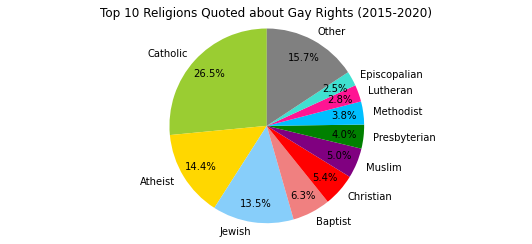

In [151]:
labels = top10.index.str.title()
sizes = top10.ct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'purple', 'green', 'deepskyblue', 'deeppink', 'turquoise', 'grey']
patches, texts, junk = plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.8, labeldistance = 1.1)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title("Top 10 Religions Quoted about Gay Rights (2015-2020)")
plt.show()